<a href="https://colab.research.google.com/github/juno2856/deeplearning/blob/master/NLP/%EC%9E%90%EC%97%B0%EC%96%B4%EC%B2%98%EB%A6%AC_20220524.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tensorflow Tokenizer 복습

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
sentences = ['nice great best amazing', 'stop lies', 'pitiful nerd', 'excellent word', 'supreme qulity', 'bad', 'highly respectable']
y_train = [1, 0, 0, 1, 1, 0, 1]

In [ ]:
t= Tokenizer()
t.fit_on_texts(sentences) # 텍스트 -> 리스트
vocab_size = len(t.word_index)+1  # 단어장
print(vocab_size) 

16


In [ ]:
print(t.word_index)

{'nice': 1, 'great': 2, 'best': 3, 'amazing': 4, 'stop': 5, 'lies': 6, 'pitiful': 7, 'nerd': 8, 'excellent': 9, 'word': 10, 'supreme': 11, 'qulity': 12, 'bad': 13, 'highly': 14, 'respectable': 15}


In [ ]:
x_encoded = t.texts_to_sequences(sentences) # 텍스트 -> 시퀀스
print(x_encoded)

[[1, 2, 3, 4], [5, 6], [7, 8], [9, 10], [11, 12], [13], [14, 15]]


In [ ]:
# x_encoded의 최대값을 구하기
max_len = max(len(l) for l in x_encoded)
print(max_len)

4


In [ ]:
type(y_train)
print(y_train)

[1, 0, 0, 1, 1, 0, 1]


In [ ]:
x_train = pad_sequences(x_encoded, maxlen = 4, padding = 'post')
y_train = np.array(y_train)
print(type(y_train))

<class 'numpy.ndarray'>


In [ ]:
print(x_train)

[[ 1  2  3  4]
 [ 5  6  0  0]
 [ 7  8  0  0]
 [ 9 10  0  0]
 [11 12  0  0]
 [13  0  0  0]
 [14 15  0  0]]


In [ ]:
print(type(x_train))
print(type(y_train))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten

youngwoo = Sequential()
youngwoo.add(Embedding(vocab_size, 2, input_length = max_len)) # vocab_size = 15
youngwoo.add(Flatten())
youngwoo.add(Dense(1, activation = 'sigmoid'))
youngwoo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 4, 2)              32        
                                                                 
 flatten (Flatten)           (None, 8)                 0         
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


In [ ]:
youngwoo.compile(optimizer = 'adam',
                 loss= 'binary_crossentropy',
                 metrics = ['acc'])

In [ ]:
youngwoo.fit(x_train, y_train, epochs = 100, verbose =1)

Epoch 1/100
1/1 [==============================] - 6s 6s/step - loss: 0.6933 - acc: 0.5714
Epoch 2/100
1/1 [==============================] - 0s 16ms/step - loss: 0.6920 - acc: 0.5714
Epoch 3/100
1/1 [==============================] - 0s 14ms/step - loss: 0.6906 - acc: 0.5714
Epoch 4/100
1/1 [==============================] - 0s 13ms/step - loss: 0.6892 - acc: 0.7143
Epoch 5/100
1/1 [==============================] - 0s 16ms/step - loss: 0.6879 - acc: 0.7143
Epoch 6/100
1/1 [==============================] - 0s 25ms/step - loss: 0.6865 - acc: 0.7143
Epoch 7/100
1/1 [==============================] - 0s 28ms/step - loss: 0.6852 - acc: 0.7143
Epoch 8/100
1/1 [==============================] - 0s 15ms/step - loss: 0.6838 - acc: 0.7143
Epoch 9/100
1/1 [==============================] - 0s 12ms/step - loss: 0.6825 - acc: 0.7143
Epoch 10/100
1/1 [==============================] - 0s 13ms/step - loss: 0.6811 - acc: 0.7143
Epoch 11/100
1/1 [==============================] - 0s 14ms/step - loss

# 네이버 영화 리뷰 감성 분석
20220518 참조

In [ ]:
import pandas as pd
import urllib.request
import matplotlib.pyplot as plt
import re
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences
from collections import Counter

In [ ]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt", filename="ratings_train.txt") # train
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt", filename="ratings_test.txt") # test
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt", filename="ratings.txt") # train + test

('ratings.txt', <http.client.HTTPMessage at 0x7f81300da410>)

In [ ]:
!pip install konlpy
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git 
%cd Mecab-ko-for-Google-Colab/
!bash install_mecab-ko_on_colab190912.sh
%cd ../

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 477 kB/s 
     |████████████████████████████████| 453 kB 63.9 MB/s 
Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 115, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 115 (delta 11), reused 10 (delta 3), pack-reused 91
Receiving objects: 100% (115/115), 1.27 MiB | 32.52 MiB/s, done.
Resolving deltas: 100% (50/50), done.
/content/Mecab-ko-for-Google-Colab
Installing konlpy.....
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2022-05-24 01:40:11--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
Resolving bitbucket.org (bitbucket.org)... 104.

In [ ]:
train_data = pd.read_table('ratings_train.txt')
test_data = pd.read_table('ratings_test.txt')

In [ ]:
from konlpy.tag import Mecab
tokenizer = Mecab()

In [ ]:
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [ ]:
def tokenize_and_remove_stopwords(data, stopwords, tokenizer):
    result = []

    for sentence in data:
        curr_data = []
        curr_data = tokenizer.morphs(sentence) # mecab 형태소 분석 tokenizer
        curr_data = [word for word in curr_data if not word in stopwords] # 불용어 제거
        result.append(curr_data)
    return result

In [ ]:
def load_data(train_data, test_data, num_words=10000):

    # 중복 제거
    train_data.drop_duplicates(subset=['document'], inplace=True)
    test_data.drop_duplicates(subset=['document'], inplace=True)

    # Nan 결측치 제거
    train_data = train_data.dropna(how='any')
    test_data = test_data.dropna(how='any')

    # 토큰화 및 불용어 제거
    x_train = tokenize_and_remove_stopwords(train_data['document'], stopwords, tokenizer)
    x_test = tokenize_and_remove_stopwords(test_data['document'], stopwords, tokenizer)

    # 단어장 만드는 중...
    words = np.concatenate(x_train).tolist()
    counter = Counter(words)
    counter = counter.most_common(10000-4)
    vocab = ['<PAD>', '<BOS>', '<UNK>', '<UNUSED>'] + [key for key, _ in counter]
    word_to_index = {word:index for index, word in enumerate(vocab)}

    def wordlist_to_indexlist(wordlist):
        return [word_to_index[word] if word in word_to_index else word_to_index['<UNK>'] for word in wordlist]
    
    x_train = list(map(wordlist_to_indexlist, x_train))
    x_test = list(map(wordlist_to_indexlist, x_test))

    return x_train, np.array(list(train_data['label'])), x_test, np.array(list(test_data['label'])), word_to_index

In [ ]:
x_train, y_train, x_test, y_test, word_to_index = load_data(train_data, test_data)

In [ ]:
index_to_word = {index:word for word, index in word_to_index.items()}

In [ ]:
# 문장 1개를 활용할 딕셔너리와 함께 주면, 단어 인덱스 리스트 벡터로 변환해 주는 함수
# 단, 모든 문장은 <BOS>로 시작하는 것을 말합니다.

def get_encoded_sentence(sentence, word_to_index): ##### 텍스트 -> 숫자
    return [word_to_index['<BOS>']] + [word_to_index[word] if word in word_to_index else word_to_index['<UNK>'] for word in sentence.split()]

# 여러 개의 문장 리스트를 한꺼번에 단어 인덱스 리스트 벡터로 encode해주는 함수입니다.
def get_encoded_sentences(sentences, word_to_index):
    return [get_encoded_sentence(sentence, word_to_index) for sentence in sentences]

# 숫자 벡터로 encode된 문장을 원래대로 decode하는 함수입니다. ##### 숫자 -> 텍스트
def get_decoded_sentence(encoded_sentence, index_to_word):
    return ' '.join(index_to_word[index] if index in index_to_word else '<UNK>' for index in encoded_sentence[1:])

# 여러개의 숫자 벡터로 encode된 문장을 한꺼번에 원래대로 decode하는 함수입니다.
def get_decoded_sentences(encoded_sentences, index_to_word):
    return [get_decoded_sentence(encoded_sentence, index_to_word) for encoded_sentence in encoded_sentences]

In [ ]:
# 데이터 셋 내 문장 길이 분포
total_data_text = list(x_train) + list(x_test)

# 텍스트데이터 문장길이의 리스트를 생성한 후
num_tokens = [len(tokens) for tokens in total_data_text]
num_tokens = np.array(num_tokens)

# 문장 길이의 평균값, 최대값, 표준편차를 계산
print('문장길이 평균 :', np.mean(num_tokens))
print('문장길이 최대 :', np.max(num_tokens))
print('문장길이 표준편차 : ', np.std(num_tokens))

# 예를 들면 최대길이를 (평균 + 2*표준편차)로 한다면,
max_tokens = np.mean(num_tokens) +2 * np.std(num_tokens)

maxlen = int(max_tokens)
print('pad_sequences maxlen : ', maxlen)
print('전체 문장의 {}%가 maxlen 설정값 이내에 포함됩니다. '.format(np.sum(num_tokens < max_tokens)/len(num_tokens)))

문장길이 평균 : 15.96938143432699
문장길이 최대 : 116
문장길이 표준편차 :  12.843571939469296
pad_sequences maxlen :  41
전체 문장의 0.9342988343341575%가 maxlen 설정값 이내에 포함됩니다. 


In [ ]:
# 패딩 추가
x_train = pad_sequences(x_train, value=word_to_index['<PAD>'], padding='pre', maxlen=maxlen)
x_test = pad_sequences(x_test, value=word_to_index['<PAD>'], padding='pre', maxlen=maxlen)

In [ ]:
print(x_train.shape)
print(x_test.shape)

(146182, 41)
(49157, 41)


In [ ]:
vocab_size = 10000
word_vector_dim = 200 # 2의 배수

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model.add(keras.layers.LSTM(8))
model.add(keras.layers.Dense(8, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 200)         2000000   
                                                                 
 lstm (LSTM)                 (None, 8)                 6688      
                                                                 
 dense_1 (Dense)             (None, 8)                 72        
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 2,006,769
Trainable params: 2,006,769
Non-trainable params: 0
_________________________________________________________________


In [ ]:
x_val = x_train[:50000]
y_val = y_train[:50000]

partial_x_train = x_train[50000:]
partial_y_train = y_train[50000:]

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
epochs= 100
history = model.fit(partial_x_train, partial_y_train, epochs=epochs, batch_size=512, validation_data=(x_val, y_val), verbose=1)

Epoch 1/100
188/188 [==============================] - 6s 11ms/step - loss: 0.4704 - accuracy: 0.7964 - val_loss: 0.3626 - val_accuracy: 0.8464
Epoch 2/100
188/188 [==============================] - 2s 12ms/step - loss: 0.3331 - accuracy: 0.8615 - val_loss: 0.3474 - val_accuracy: 0.8506
Epoch 3/100
188/188 [==============================] - 3s 14ms/step - loss: 0.3019 - accuracy: 0.8754 - val_loss: 0.3467 - val_accuracy: 0.8522
Epoch 4/100
188/188 [==============================] - 3s 14ms/step - loss: 0.2804 - accuracy: 0.8845 - val_loss: 0.3530 - val_accuracy: 0.8509
Epoch 5/100
188/188 [==============================] - 3s 13ms/step - loss: 0.2613 - accuracy: 0.8934 - val_loss: 0.3610 - val_accuracy: 0.8510
Epoch 6/100
188/188 [==============================] - 3s 14ms/step - loss: 0.2432 - accuracy: 0.9010 - val_loss: 0.3604 - val_accuracy: 0.8507
Epoch 7/100
188/188 [==============================] - 2s 12ms/step - loss: 0.2264 - accuracy: 0.9083 - val_loss: 0.3751 - val_accuracy:

In [ ]:
results = model.evaluate(x_test, y_test, verbose=2)

1537/1537 - 5s - loss: 1.8698 - accuracy: 0.8178 - 5s/epoch - 3ms/step


In [ ]:
history_dict = history.history
print(history_dict.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [ ]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

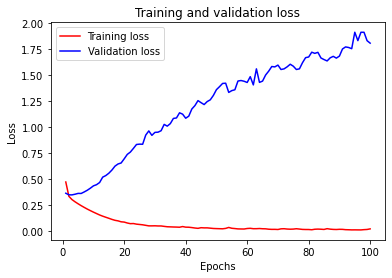

In [ ]:
epochs = range(1, len(acc)+1)

plt.plot(epochs, loss, 'r-', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

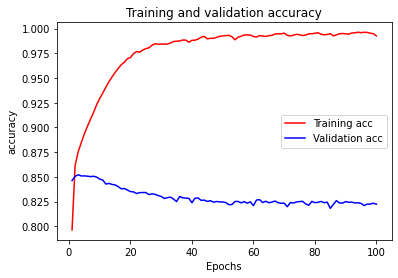

In [ ]:
plt.clf() #그림을 초기화

plt.plot(epochs, acc, 'r-', label= 'Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [ ]:
# gensim의 유사단어 찾기를 활용하여 자체학습한 임베딩과 사전학승 임베딩을 적절히 분석함

# 학습한 Embedding 파라미터를 파일에 써서 저장합니다.

word2vec_file_path = './word2vec.txt'
f = open(word2vec_file_path,'w')
f.write('{} {}\n'.format(vocab_size-4, word_vector_dim))
# 몇개의 벡터를 얼마 사이즈로 기재할지 타이틀을 쓴다.
# 단어 개수(에서 특수문자 4개는 제외하고)만큼의 워드 벡터를 파일에 기록합니다.

vectors = model.get_weights()[0]
for i in range(4, vocab_size):
  f.write('{} {}\n'.format(index_to_word[i], ' '.join(map(str, list(vectors[i,:])))))
f.close()

In [ ]:
from gensim.models.keyedvectors import Word2VecKeyedVectors

word_vectors = Word2VecKeyedVectors.load_word2vec_format(word2vec_file_path, binary = False)
vector = word_vectors['짜증']
vector

array([ 0.05405236,  0.36269572,  0.11824182, -0.19265607, -0.0463868 ,
       -0.00701942,  0.14372692, -0.20675601,  0.05586162, -0.23454826,
        0.01474006,  0.17492458, -0.07386611,  0.17893873, -0.0278506 ,
        0.42250118, -0.38080898,  0.08016901,  0.01536994,  0.01781113,
       -0.03418829, -0.11041259, -0.14925212,  0.330175  ,  0.08995836,
        0.1271965 , -0.19724247, -0.05708837,  0.41968563,  0.11430595,
       -0.16969286,  0.22772117,  0.00552919, -0.08281802, -0.0938015 ,
       -0.45163244,  0.08980918,  0.32515475,  0.04067273, -0.0127552 ,
        0.06812806,  0.22012973, -0.3203257 ,  0.13408782, -0.1450281 ,
        0.15553154, -0.26894802,  0.08052392, -0.03839342, -0.29386485,
        0.2974879 , -0.11237505,  0.16868122,  0.0782112 ,  0.05428931,
       -0.37579283,  0.02725812,  0.07931841,  0.0983282 ,  0.21548426,
       -0.21600188, -0.27680686,  0.00960998, -0.3168249 , -0.03389663,
        0.13570985, -0.13941854, -0.04331342, -0.1580942 ,  0.20

In [ ]:
word_vectors.similar_by_word("재미")

[('브라이언', 0.5252799987792969),
 ('읭', 0.5151044130325317),
 ('주변인', 0.5067102909088135),
 ('흐르', 0.4975651502609253),
 ('감자', 0.4970073699951172),
 ('떠올랐', 0.49133729934692383),
 ('땀', 0.4860912561416626),
 ('매료', 0.48298755288124084),
 ('하트', 0.4767921566963196),
 ('일대기', 0.4758079946041107)]

# 한국어 word2vec 임베딩 활용해 성능 개선

In [ ]:
import gensim

word2vec_path = '/content/drive/MyDrive/자연어처리/dataset/ko.bin'
word2vec = gensim.models.Word2Vec.load(word2vec_path)
vector = word2vec['감동']
vector

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """


array([-1.4411083 , -0.78142536,  2.453768  , -0.86445606,  0.24195324,
        0.36006922, -1.0639709 ,  0.85037315, -1.0184479 ,  0.21196692,
       -0.6679936 ,  0.6389819 , -0.26964295,  0.66028535,  0.39613017,
        0.6428288 ,  0.6648245 ,  0.08363932, -0.2540794 ,  0.55310047,
        0.63392764,  0.19311981, -0.4648248 ,  0.1490374 ,  2.0762694 ,
        0.7872764 , -0.21711552, -0.59049505, -1.3264338 , -0.06233318,
        1.2550159 , -0.05334642, -0.5453753 , -0.8736315 ,  0.5253877 ,
        0.03122815,  0.8280226 ,  0.23597455,  0.06136359,  1.5114233 ,
       -0.340495  ,  0.912277  ,  0.5899006 , -1.3025732 , -0.87596595,
        0.21738248,  1.0366931 , -0.55709684, -0.9039502 ,  0.28133616,
       -1.7572548 , -0.29769212, -0.14536098,  0.5850025 , -0.6111547 ,
       -0.29829553,  1.4106004 , -0.38685524,  0.4801454 ,  0.40166005,
        0.28174093,  1.6133646 , -0.8590998 ,  0.49886975,  0.38605362,
       -0.1607663 , -0.87983316,  0.21996935,  0.68561727, -0.84

In [ ]:
word2vec.similar_by_word("로맨틱")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similar_by_word` (Method will be removed in 4.0.0, use self.wv.similar_by_word() instead).
  """Entry point for launching an IPython kernel.


[('코미디', 0.7576364278793335),
 ('로맨스', 0.7021660804748535),
 ('스릴러', 0.6693054437637329),
 ('개그', 0.6552960872650146),
 ('주제곡', 0.6495761871337891),
 ('뮤지컬', 0.6382305026054382),
 ('시트콤', 0.6167846322059631),
 ('서부극', 0.6151247620582581),
 ('연극과', 0.6083630323410034),
 ('서정적', 0.5965933799743652)]

In [ ]:
vocab_size = 10000 # 어휘 사전의 크기
word_vector_dim = 200 # 워드 벡터의 차원 수

embedding_matrix = np.random.rand(vocab_size, word_vector_dim)

# embedding_matrix에 Word2Vec 워드벡터를 단어 하나씩마다 차례차례 카피한다

for i in range(4, vocab_size):
  if index_to_word[i] in word2vec:
    embedding_matrix[i] = word2vec[index_to_word[i]]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
from tensorflow.keras.initializers import Constant

vocab_size = 10000
word_vector_dim = 200

model = Sequential()
model.add(Embedding(vocab_size, word_vector_dim,
                    embeddings_initializer = Constant(embedding_matrix), # 카피한 임베딩 활용
                    input_length = maxlen,
                    trainable = True)) # trainable을 True로 주면 Fine_tuning

model.add(keras.layers.Conv1D(16,7, activation = 'relu'))
model.add(keras.layers.MaxPooling1D(5))
model.add(keras.layers.Conv1D(16,7, activation = 'relu'))
model.add(keras.layers.GlobalMaxPooling1D())
model.add(keras.layers.Dense(8, activation = 'relu'))
model.add(keras.layers.Dense(1, activation = 'sigmoid'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 41, 200)           2000000   
                                                                 
 conv1d (Conv1D)             (None, 35, 16)            22416     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 7, 16)            0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 1, 16)             1808      
                                                                 
 global_max_pooling1d (Globa  (None, 16)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense_3 (Dense)             (None, 8)                

In [ ]:
model.compile(optimizer='adam', 
             loss='binary_crossentropy', 
             metrics=['accuracy'])
epochs= 20

history = model.fit(partial_x_train, partial_y_train, 
                    epochs=epochs, batch_size=512, 
                    validation_data=(x_val, y_val), verbose=1)

Epoch 1/20
188/188 [==============================] - 10s 11ms/step - loss: 0.5540 - accuracy: 0.7074 - val_loss: 0.4586 - val_accuracy: 0.7845
Epoch 2/20
188/188 [==============================] - 2s 11ms/step - loss: 0.4079 - accuracy: 0.8167 - val_loss: 0.3925 - val_accuracy: 0.8244
Epoch 3/20
188/188 [==============================] - 2s 12ms/step - loss: 0.3428 - accuracy: 0.8516 - val_loss: 0.3677 - val_accuracy: 0.8385
Epoch 4/20
188/188 [==============================] - 2s 12ms/step - loss: 0.3011 - accuracy: 0.8733 - val_loss: 0.3710 - val_accuracy: 0.8403
Epoch 5/20
188/188 [==============================] - 2s 11ms/step - loss: 0.2682 - accuracy: 0.8911 - val_loss: 0.3693 - val_accuracy: 0.8426
Epoch 6/20
188/188 [==============================] - 2s 13ms/step - loss: 0.2403 - accuracy: 0.9044 - val_loss: 0.3828 - val_accuracy: 0.8421
Epoch 7/20
188/188 [==============================] - 2s 12ms/step - loss: 0.2150 - accuracy: 0.9160 - val_loss: 0.4037 - val_accuracy: 0.839

In [ ]:
result = model.evaluate(x_test, y_test, verbose =2)
print(result)

1537/1537 - 3s - loss: 0.9279 - accuracy: 0.8186 - 3s/epoch - 2ms/step
[0.927891731262207, 0.8186219930648804]
